# **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)

In [2]:
olive = pd.read_csv('../../../../../Source/2021 빅콘테스트/2021_빅콘테스트_지역활성화/유통-물류/데이터_CJ올리브네트웍스.csv')

olive.head()

,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT
0,202101,가구/인테리어,10,DIY자재/용품,1010,경상남도,48,통영시,48220,중앙동,4822010500,4
1,202101,가구/인테리어,10,수납가구,1013,전라북도,45,군산시,45130,동흥남동,4513013200,3
2,202101,가구/인테리어,10,아웃도어가구,1014,경상남도,48,통영시,48220,동호동,4822010800,3
3,202101,가구/인테리어,10,인테리어소품,1015,전라북도,45,군산시,45130,임피면 읍내리,4513033021,15
4,202101,가구/인테리어,10,침구단품,1017,전라북도,45,군산시,45130,경암동,4513013600,6


In [3]:
# 배송상품 대분류 value_counts()
olive['DL_GD_LCLS_NM'].value_counts()

생활/건강      5634
디지털/가전     4947
식품         4349
화장품/미용     3766
패션잡화       3350
가구/인테리어    2857
스포츠/레저     2811
패션의류       2798
출산/육아      2228
여행/문화       379
Name: DL_GD_LCLS_NM, dtype: int64

In [4]:
# 배송상품 중분류 value_counts()
olive['DL_GD_MCLS_NM'].value_counts()

농산물           425
가공식품          401
건강식품          397
음료            395
상의            388
             ... 
광학기기/용품        44
탁구             44
기타출산/육아        41
테니스            41
스케이트/보드/롤러     40
Name: DL_GD_MCLS_NM, Length: 146, dtype: int64

In [5]:
olive.drop(['DL_YM', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD', 'DL_GD_MCLS_CD', 'CTPV_NM', 'CTPV_CD', 'CTGG_CD', 'EMD_NM', 'LGDNG_CD'], axis=1, inplace=True)

olive

,DL_GD_MCLS_NM,CTGG_NM,INVC_CONT
0,DIY자재/용품,통영시,4
1,수납가구,군산시,3
2,아웃도어가구,통영시,3
3,인테리어소품,군산시,15
4,침구단품,군산시,6
...,...,...,...
33114,클렌징,군산시,21
33115,클렌징,군산시,5
33116,향수,군산시,4
33117,헤어스타일링,통영시,6


In [6]:
# 지역별 데이터 구분
GunSan = olive[olive['CTGG_NM']=='군산시']
MokPo = olive[olive['CTGG_NM']=='목포시']
TongYeong = olive[olive['CTGG_NM']=='통영시']

In [7]:
# 배송상품 중분류 기준 그루핑
GunSan_middle = GunSan.groupby('DL_GD_MCLS_NM').sum().sort_values(by='INVC_CONT', ascending=False)[:20]

GunSan_middle

,INVC_CONT
DL_GD_MCLS_NM,
음료,77774
건강식품,71495
가공식품,71345
농산물,65333
문화컨텐츠,63567
상의,62752
생활용품,60623
냉동/간편조리식품,45801
주방용품,44407


In [8]:
MokPo_middle = MokPo.groupby('DL_GD_MCLS_NM').sum().sort_values(by='INVC_CONT', ascending=False)[:20]

MokPo_middle

,INVC_CONT
DL_GD_MCLS_NM,
음료,70445
농산물,64044
건강식품,64019
가공식품,62117
상의,60764
생활용품,57384
문화컨텐츠,53627
주방용품,42506
하의,41782


In [9]:
TongYeong_middle = TongYeong.groupby('DL_GD_MCLS_NM').sum().sort_values(by='INVC_CONT', ascending=False)[:20]

TongYeong_middle

,INVC_CONT
DL_GD_MCLS_NM,
건강식품,34452
농산물,34410
음료,33503
가공식품,32425
생활용품,28069
상의,27498
문화컨텐츠,27422
주방용품,21077
스킨케어,20395


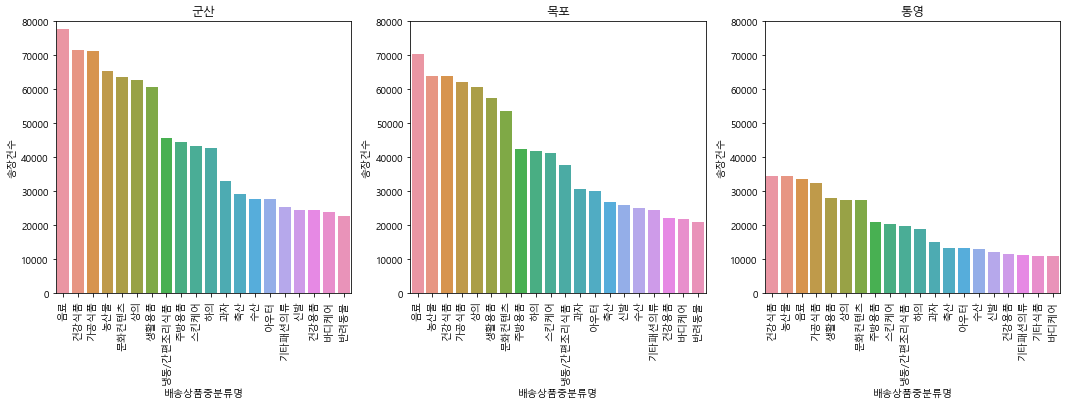

In [10]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
sns.barplot(data=GunSan_middle, x=GunSan_middle.index, y='INVC_CONT')
plt.xticks(rotation=90)
plt.ylim(0, 80000)
plt.xlabel('배송상품중분류명')
plt.ylabel('송장건수')
plt.title('군산')

plt.subplot(132)
sns.barplot(data=MokPo_middle, x=MokPo_middle.index, y='INVC_CONT')
plt.xticks(rotation=90)
plt.ylim(0, 80000)
plt.xlabel('배송상품중분류명')
plt.ylabel('송장건수')
plt.title('목포')

plt.subplot(133)
sns.barplot(data=TongYeong_middle, x=TongYeong_middle.index, y='INVC_CONT')
plt.xticks(rotation=90)
plt.ylim(0, 80000)
plt.xlabel('배송상품중분류명')
plt.ylabel('송장건수')
plt.title('통영')

plt.show()

**중분류 기준**으로 보면 <span style="color:orange">**군산 > 목포 > 통영**</span>순으로 송장건수가 많고, <span style="color:blue">**Top20 상품 구성은 비슷**</span>함

In [11]:
# # 방법 1
# top20 = olive['DL_GD_MCLS_NM'].value_counts()[:20]
# top20 = list(top20.index)

# top20

In [12]:
# olive_top20 = olive[olive.DL_GD_MCLS_NM.isin(top20)]

# olive_top20

In [13]:
# # 방법 2
# # 빈 데이터프레임 생성
# DF = pd.DataFrame(columns = ['DL_YM', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD', 'DL_GD_MCLS_NM', 'DL_GD_MCLS_CD',
#                              'CTPV_NM', 'CTPV_CD', 'CTGG_NM', 'CTGG_CD', 'EMD_NM', 'LGDNG_CD', 'INVC_CONT'])

# n = 0
# for i in range(len(olive['DL_GD_MCLS_NM'])):
#     if olive.iloc[i, 3] in top20:
#         DF.loc[n] = olive.loc[i]
#         n += 1
#     else:
#         pass

# DF